In [29]:
import os
print (os.getcwd())

/home/cesar/python-projects/Overcooked-coop-voice


In [30]:
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.visualization.visualization_utils import show_image_in_ipython
from overcooked_ai_py.utils import generate_temporary_file_path
from overcooked_ai_py.mdp.overcooked_mdp import OvercookedGridworld
from overcooked_ai_py.visualization.pygame_utils import vstack_surfaces
import pygame
import numpy as np

In [32]:
# Initialisation de pygame pour les visualisations
import pygame
pygame.init()
pygame.display.set_mode((1, 1))  # Mode headless pour les notebooks

<Surface(1x1x32 SW)>

In [36]:
state_visualizer = StateVisualizer()
def render_state(grid_txt):
    grid = [layout_row.strip() for layout_row in grid_txt.split("\n")]
    mdp = OvercookedGridworld.from_grid(grid)
    mdp.start_state = mdp.get_standard_start_state()
    print("Recettes disponibles:", mdp.start_state.all_orders)
    
    # Rendu de la grille
    grid_surface = pygame.surface.Surface(state_visualizer._unscaled_grid_pixel_size(mdp.terrain_mtx))
    state_visualizer._render_grid(grid_surface, mdp.terrain_mtx)
    state_visualizer._render_players(grid_surface, mdp.start_state.players)
    state_visualizer._render_objects(grid_surface, mdp.start_state.objects, mdp.terrain_mtx)
    
    # Rendu du HUD
    hud_data = state_visualizer.default_hud_data(mdp.start_state)
    hud_surface = pygame.surface.Surface((300, state_visualizer._calculate_hud_height(hud_data)))
    hud_surface.fill(state_visualizer.background_color)
    state_visualizer._render_hud_data(hud_surface, hud_data)
    
    # Combinaison des surfaces
    rendered_surface = vstack_surfaces([grid_surface, hud_surface], state_visualizer.background_color)
    img_path = generate_temporary_file_path(prefix="overcooked_visualized_state_", extension=".png")
    pygame.image.save(rendered_surface, img_path)
    show_image_in_ipython(img_path, width=700)

In [41]:
state_visualizer = StateVisualizer()
def render_layout(grid_txt):
    grid = [layout_row.strip() for layout_row in grid_txt.split("\n")]
    mdp = OvercookedGridworld.from_grid(grid)
    mdp.start_state = mdp.get_standard_start_state()
    grid_surface = pygame.surface.Surface(state_visualizer._unscaled_grid_pixel_size(mdp.terrain_mtx))
    state_visualizer._render_grid(grid_surface, mdp.terrain_mtx)
    state_visualizer._render_players(grid_surface, mdp.start_state.players)
    img_path = generate_temporary_file_path(prefix="overcooked_visualized_layout_", extension=".png")
    pygame.image.save(grid_surface, img_path)
    show_image_in_ipython(img_path, width=700)

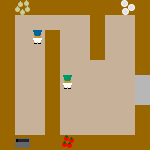

Recettes disponibles: [('onion',), ('onion', 'onion'), ('onion', 'onion', 'onion'), ('tomato',), ('tomato', 'tomato'), ('tomato', 'tomato', 'tomato'), ('onion', 'tomato'), ('onion', 'onion', 'tomato'), ('onion', 'tomato', 'tomato')]


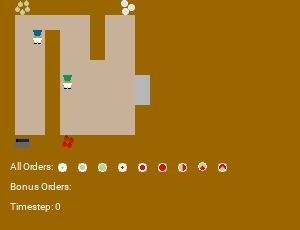

In [ ]:
grid_txt ="""XOXXXXXXDX
             X       X
             X 1X  X  X
             X  X  X  X
             X  X     X
             X  X2    S
             X  X     X
             X  Y     X
             X  Y     X
             XPXXTXXXXX"""
render_layout(grid_txt)
render_state(grid_txt)

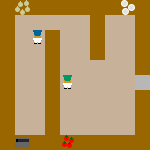

Recettes disponibles: [('onion',), ('onion', 'onion'), ('onion', 'onion', 'onion'), ('tomato',), ('tomato', 'tomato'), ('tomato', 'tomato', 'tomato'), ('onion', 'tomato'), ('onion', 'onion', 'tomato'), ('onion', 'tomato', 'tomato')]


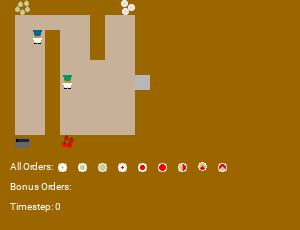

In [19]:
grid_txt ="""XOXXXXXXDX
             X     Y  X
             X 1X  X  X
             X  X  X  X
             X  X     X
             X  X2    S
             X  X     X
             X  Y     X
             X  Y     X
             XPXXTXXXXX"""
render_layout(grid_txt)
render_state(grid_txt)

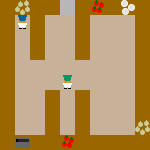

In [8]:
grid_txt ="""XOXXSXTXDX
             X1Y  X   X
             X X  Y   X
             X X  X   X
             X        X
             X   2    X
             X  X X   X
             X  Y X   X
             X  Y Y   O
             XPXXTXXXXX"""
render_layout(grid_txt)

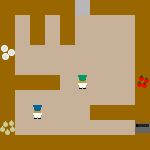

In [9]:
grid_txt = """XXXXXSXXXX
				X Y X    X
				X Y X    X
				D        X
				X        X
				XXXX 2   T
				X        X
				X 1   XXXX
				O        P
				XXXXXXXXXX"""
render_layout(grid_txt)

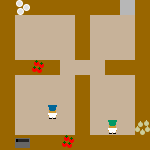

In [10]:
grid_txt ="""XDXXXXXXSX
             X    X   X
             X    X   X
             X    X   X
             XYTX   XXX
             X    X   X
             X    X   X
             X  1 Y   X
             X    Y 2 O
             XPXXTXXXXX"""
render_layout(grid_txt)

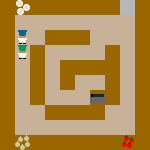

In [11]:
grid_txt ="""XDXXXXXXSX
             X        X
             X1 XXX   X
             X2Y    X X
             X X XXYX X
             X X X  Y X
             X X   PX X
             X  XXYX  X
             X        X
             XOXXXXXXTX"""
render_layout(grid_txt)

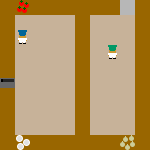

In [12]:
grid_txt ="""XTXXXXXXSX
             X    X   X
             X1   X   X
             X    Y 2 X
             X    Y   X
             P    Y   X
             X    Y   X
             X    X   X
             X    X   X
             XDXXXXXXOX"""
render_layout(grid_txt)

In [ ]:
# Affichage de tous les layouts du dossier generation_cesar
import os
import json
import glob

def load_and_display_layout_from_file(layout_path):
    """Charge et affiche un layout depuis un fichier .layout (JSON ou texte simple)"""
    try:
        with open(layout_path, 'r', encoding='utf-8') as f:
            content = f.read().strip()
        
        layout_name = os.path.basename(layout_path).replace('.layout', '')
        
        # Essayer de parser comme JSON d'abord
        try:
            layout_data = json.loads(content)
            grid_txt = layout_data['grid']
            
            print(f"\n{'='*60}")
            print(f"📁 Layout: {layout_name}")
            print(f"📊 Recettes: {layout_data.get('start_all_orders', [])}")
            print(f"🥄 Valeur oignon: {layout_data.get('onion_value', 'N/A')}")
            print(f"🍅 Valeur tomate: {layout_data.get('tomato_value', 'N/A')}")
            print(f"{'='*60}")
            
        except json.JSONDecodeError:
            # Si ce n'est pas du JSON, traiter comme du texte simple
            grid_txt = content
            
            print(f"\n{'='*60}")
            print(f"📁 Layout: {layout_name} (format texte)")
            print(f"{'='*60}")
        
        # Afficher le layout
        render_layout(grid_txt)
        
        return True
        
    except Exception as e:
        print(f"❌ Erreur lors du chargement de {layout_name}: {e}")
        return False

def explore_layouts_in_directory(directory_path, directory_name):
    """Explore et affiche tous les layouts d'un répertoire donné"""
    print(f"🔍 Recherche dans: {directory_path}")
    
    if not os.path.exists(directory_path):
        print(f"❌ Répertoire non trouvé: {directory_path}")
        return False
    
    layout_files = glob.glob(os.path.join(directory_path, "*.layout"))
    layout_files.sort()  # Trier par nom
    
    if not layout_files:
        print(f"❌ Aucun fichier .layout trouvé dans {directory_name}")
        return False
    
    print(f"✅ {len(layout_files)} layouts trouvés dans {directory_name}")
    success_count = 0
    
    # Afficher tous les layouts
    for layout_file in layout_files:
        if load_and_display_layout_from_file(layout_file):
            success_count += 1
    
    print(f"\n? Résumé: {success_count}/{len(layout_files)} layouts affichés avec succès")
    return True

# Rechercher les layouts dans différents dossiers
directories_to_check = [
    ("./overcooked_ai_py/data/layouts/generation_cesar/", "generation_cesar"),
    ("./overcooked_ai_py/data/layouts/generation_cesar_static/", "generation_cesar_static")
]

layouts_found = False

for directory_path, directory_name in directories_to_check:
    print(f"\n🗂️  Exploration du dossier: {directory_name}")
    print("="*80)
    
    if explore_layouts_in_directory(directory_path, directory_name):
        layouts_found = True
        break  # Arrêter après avoir trouvé le premier dossier avec des layouts

if not layouts_found:
    print("\n❌ Aucun layout trouvé dans les répertoires spécifiés")
    print("💡 Vérifiez que les layouts ont été générés correctement")
    print("📁 Répertoires vérifiés:")
    for directory_path, directory_name in directories_to_check:
        print(f"   - {directory_path}")